## Essai 1


In [1]:
import os
import csv
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

nltk_stopwords = set(stopwords.words('french')+ [
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", 
    "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", 
    "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", 
    "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
    "mine", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "nouveaux", "ou", "où", "par", "parce", 
    "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", 
    "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta", "tandis", 
    "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "valeur", "voie", "voient", "vont", 
    "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être", "de", "a", "4", "-", "une", "plus","7", 
    "un", "se", "'","_",'‘', 'ne', "cette", "bien", "toujours", "si", "aussi", "peu", "deux", "trois", "quatre", "cinq",
    "nature", "faire", "faut", "peut", "doit", "doivent", "peuvent", "peu", "peuvent", "peut", "peut", "peut", "peut",
    'chez', 'méme', "soit", "dont", "non", "tous", "toutes", "toute", "toute", "toute", "toute", "toute", "toute", "toute",
    'c’est', "dune", "d’une", "tant", "ainsi", "cest", "surtout", "étre", "pourtant", "souvent", "trés", "leurs", "quelques", 
    " ", "pendant", "aprés", "autres", "ment", "celle", "beaucoup"
])



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
import pandas as pd

def get_word_occurences(directory_path, stopwords=nltk_stopwords):
    word_counter = Counter()
    sub_dir_name = directory_path.strip('/').split('/')[-1]
    os.makedirs(f"../data/occurences/{sub_dir_name}", exist_ok=True)
    for sub_dir in os.listdir(directory_path):
        for file in os.listdir(os.path.join(directory_path, sub_dir)):
            p = os.path.join(directory_path, sub_dir)
            f = os.path.join(p, file)
            if f.endswith(".txt"):
                with open(f, 'r', encoding='utf-8') as f:
                    text = f.read()
                    tokens = word_tokenize(text)
                    words = [word.lower() for word in tokens if word.isalpha() and len(word) > 3 and word.lower() not in stopwords]
                    for word in words:
                        if word.endswith('s') and word[:-1] in word_counter:
                            word_counter[word[:-1]] += 1
                        else:
                            word_counter[word] += 1
        df = pd.DataFrame(word_counter.items(), columns=['Word', 'Count'])
        df.to_csv(f"../data/occurences/{sub_dir_name}/{sub_dir}_word_occurences.csv", index=False)
        

In [3]:
path_mixte = '../data/txt/ouvrages_mixtes/'
path_femmes = '../data/txt/ouvrages_feminins/'
path_hommes = '../data/txt/ouvrages_masculins/'

get_word_occurences(path_mixte)
get_word_occurences(path_hommes)
get_word_occurences(path_femmes)


In [4]:
import pandas as pd
import glob

def analyze_word_occurrences(directory_path):
    all_files = glob.glob(directory_path + "/*.csv")
    df_list = []
    for filename in all_files:
        df = pd.read_csv(filename)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df = combined_df.groupby('Word').sum().reset_index()
    combined_df = combined_df.sort_values(by='Count', ascending=False)
    return combined_df

# Analyse des occurrences de mots pour chaque catégorie
df_mixte = analyze_word_occurrences("../data/occurences/ouvrages_mixtes")
df_femmes = analyze_word_occurrences("../data/occurences/ouvrages_feminins")
df_hommes = analyze_word_occurrences("../data/occurences/ouvrages_masculins")

# Affichage des résultats
print("Top 10 des mots les plus fréquents dans les ouvrages mixtes:")
print(df_mixte.head(10))

print("\nTop 10 des mots les plus fréquents dans les ouvrages féminins:")
print(df_femmes.head(10))

print("\nTop 10 des mots les plus fréquents dans les ouvrages masculins:")
print(df_hommes.head(10))

Top 10 des mots les plus fréquents dans les ouvrages mixtes:
            Word  Count
3796      enfant   3456
11003      temps   1360
6591        main   1286
5879       jeune   1248
1326        bras   1237
8142        pied   1179
7083   mouvement   1097
6047        lait   1074
5917        jour   1001
6841        mere    980

Top 10 des mots les plus fréquents dans les ouvrages féminins:
          Word   Count
17816   enfant  104555
20350    femme   74133
28510     lait   61782
31841   malade   45902
27807     jour   42227
31848  maladie   35735
27642    jeune   33201
38711    petit   30639
24239    heure   30481
7629     cause   29645

Top 10 des mots les plus fréquents dans les ouvrages masculins:
          Word   Count
39822    femme  370618
34431   enfant  252312
54668     jour  147511
78113    point  131723
55866     lait  117210
61555  maladie  115043
48203    homme  105753
32704    effet   97335
54257    jeune   95955
73603   partie   94459


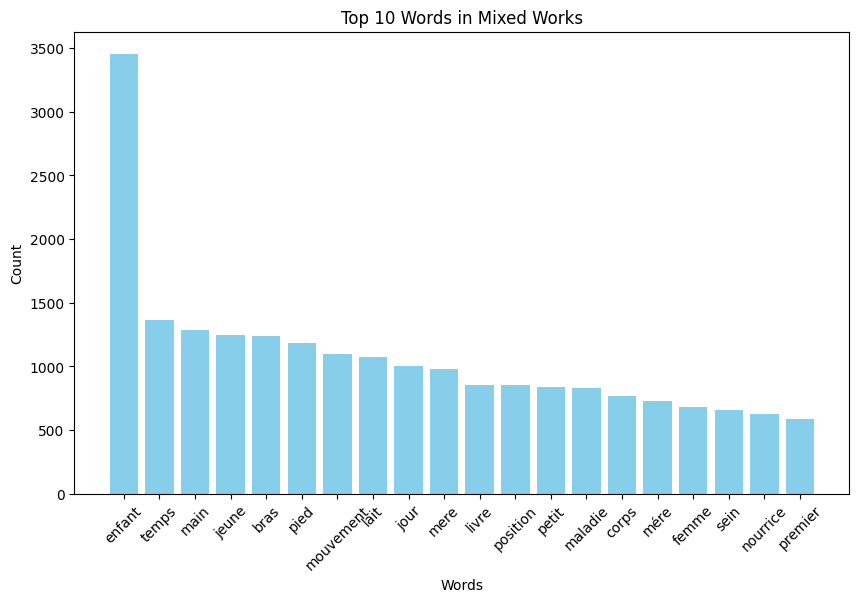

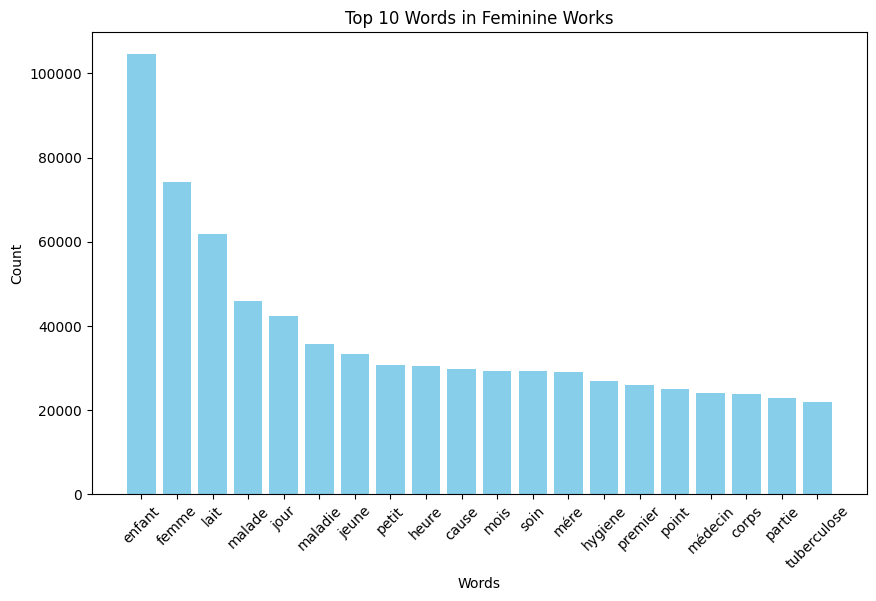

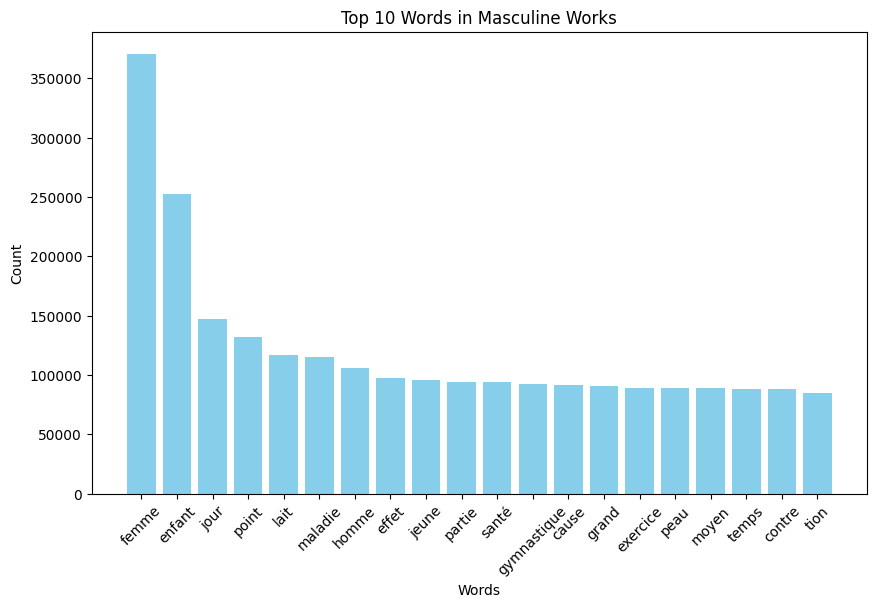

In [5]:
import matplotlib.pyplot as plt

def plot_top_words(df, title):
    top_words = df.head(20)
    plt.figure(figsize=(10, 6))
    plt.bar(top_words['Word'], top_words['Count'], color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plotting the top 10 words for each category
plot_top_words(df_mixte, 'Top 10 Words in Mixed Works')
plot_top_words(df_femmes, 'Top 10 Words in Feminine Works')
plot_top_words(df_hommes, 'Top 10 Words in Masculine Works')

## Essai 2

In [12]:
import os
import re
import csv
from collections import Counter
from nltk.corpus import stopwords
from unidecode import unidecode  # Pour enlever les accents

# Charger les stopwords en français
nltk_stopwords = set(stopwords.words('french') + [
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", 
    "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", 
    "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", 
    "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
    "mine", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "nouveaux", "ou", "où", "par", "parce", 
    "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", 
    "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta", "tandis", 
    "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "valeur", "voie", "voient", "vont", 
    "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être", "de", "a", "4", "-", "une", "plus","7", 
    "un", "se", "'", "_",'‘', 'ne', "cette", "bien", "toujours", "si", "aussi", "peu", "deux", "trois", "quatre", 
    "cinq", "nature", "faire", "faut", "peut", "doit", "doivent", "peuvent", "chez", "méme", "soit", "dont", "non", 
    "tous", "toutes", "toute", "c’est", "dune", "d’une", "tant", "ainsi", "cest", "surtout", "étre", "pourtant", 
    "souvent", "trés", "leurs", "quelques", " ", "pendant", "aprés", "autres", "ment", "celle", "beaucoup"
])

def process_word(word, all_words_in_text):
    """
    Si le mot finit par 's', vérifie si la version sans 's' existe dans
    la liste des mots du fichier texte.
    """
    # Supprimer les accents
    word = unidecode(word)
    
    # Si le mot finit par 's', vérifier la validité du mot sans le 's'
    if word.endswith('s'):
        singular_form = word[:-1]
        if singular_form in all_words_in_text:
            return singular_form
    
    # Retourner le mot tel quel sinon
    return word

def count_words_across_subfolders(folder_path, output_csv):
    # Initialiser un compteur global
    global_counter = Counter()

    # Explorer tous les sous-dossiers
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    # Lire et traiter le contenu du fichier
                    text = f.read().lower()
                    
                    # Tokenisation simple : mots de 4 caractères ou plus
                    words = re.findall(r'\b\w{4,}\b', text)
                    
                    # Supprimer les accents des mots du texte
                    all_words_in_text = set(unidecode(w) for w in words)
                    
                    # Appliquer les transformations aux mots
                    processed_words = [
                        process_word(word, all_words_in_text) 
                        for word in words 
                        if word not in nltk_stopwords
                    ]
                    
                    # Mettre à jour le compteur global
                    global_counter.update(processed_words)
    
    # Sauvegarder les résultats dans un fichier CSV
    with open(output_csv, 'w', encoding='utf-8', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Mot', 'Occurences'])
        for word, count in global_counter.most_common():
            writer.writerow([word, count])

    print(f"Fichier CSV généré : {output_csv}")



In [13]:

folder_path = "../data/txt/ouvrages_mixtes"
output_csv = "../data/occurences/ouvrages_mixtes.csv"

count_words_across_subfolders(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_mixtes.csv


In [14]:

folder_path = "../data/txt/ouvrages_feminins"
output_csv = "../data/occurences/ouvrages_feminins.csv"

count_words_across_subfolders(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_feminins.csv


In [15]:

folder_path = "../data/txt/ouvrages_masculins"
output_csv = "../data/occurences/ouvrages_masculins.csv"

count_words_across_subfolders(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_masculins.csv


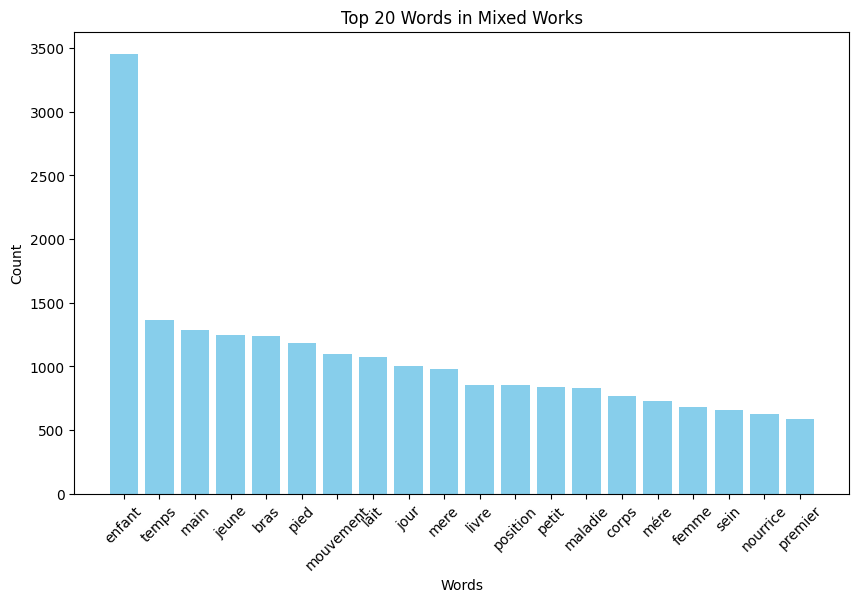

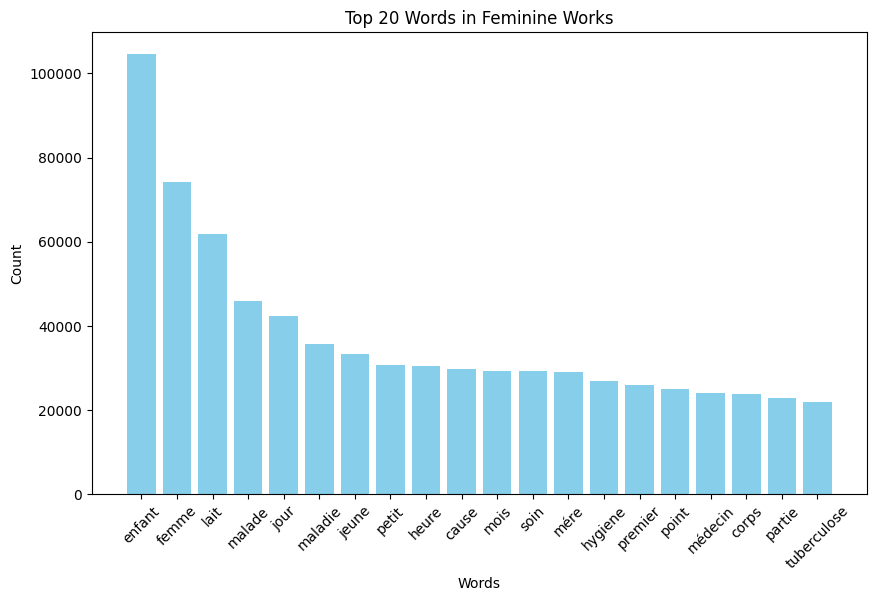

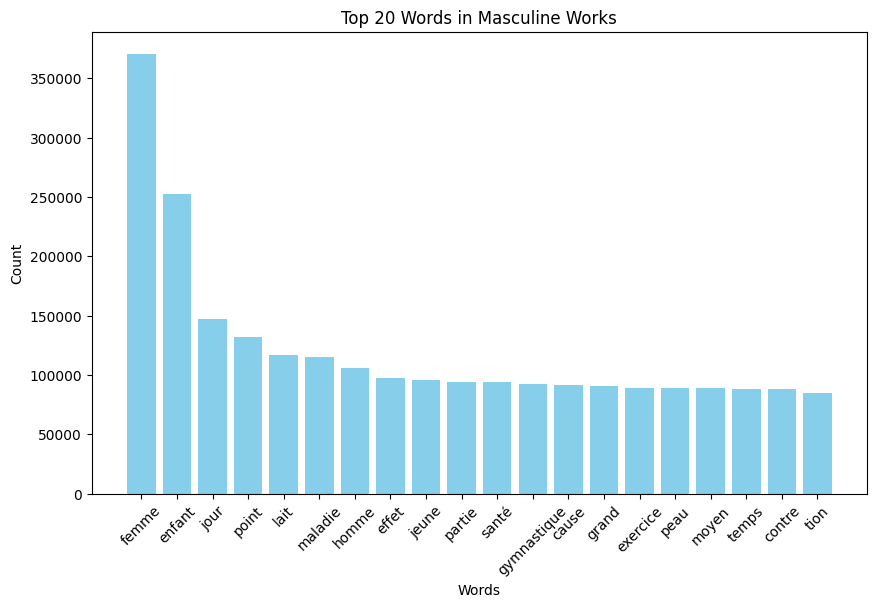

In [17]:
# Plotting the top 10 words for each category
plot_top_words(df_mixte.head(20), 'Top 20 Words in Mixed Works')
plot_top_words(df_femmes.head(20), 'Top 20 Words in Feminine Works')
plot_top_words(df_hommes.head(20), 'Top 20 Words in Masculine Works')

## etude indiv


In [26]:
import os
import re
import csv
from collections import Counter
from nltk.corpus import stopwords
from unidecode import unidecode  # Pour enlever les accents

# Charger les stopwords en français
nltk_stopwords = set(stopwords.words('french') + [
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", 
    "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", 
    "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", 
    "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
    "mine", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "nouveaux", "ou", "où", "par", "parce", 
    "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", 
    "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta", "tandis", 
    "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "valeur", "voie", "voient", "vont", 
    "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être", "de", "a", "4", "-", "une", "plus","7", 
    "un", "se", "'", "_",'‘', 'ne', "cette", "bien", "toujours", "si", "aussi", "peu", "deux", "trois", "quatre", 
    "cinq", "nature", "faire", "faut", "peut", "doit", "doivent", "peuvent", "chez", "méme", "soit", "dont", "non", 
    "tous", "toutes", "toute", "c’est", "dune", "d’une", "tant", "ainsi", "cest", "surtout", "étre", "pourtant", 
    "souvent", "trés", "leurs", "quelques", " ", "pendant", "aprés", "autres", "ment", "celle", "beaucoup"
])

def process_word(word, all_words_in_text):
    """
    Si le mot finit par 's', vérifie si la version sans 's' existe dans
    la liste des mots du fichier texte.
    """
    # Supprimer les accents
    word = unidecode(word)
    
    # Si le mot finit par 's', vérifier la validité du mot sans le 's'
    if word.endswith('s'):
        singular_form = word[:-1]
        if singular_form in all_words_in_text:
            return singular_form
    
    # Retourner le mot tel quel sinon
    return word

def count_words_and_generate_csv(folder_path, output_path):
    # Explorer les sous-dossiers
    for root, dirs, files in os.walk(folder_path):
        # Compteur pour chaque sous-dossier
        subfolder_counter = Counter()

        # Filtrer les fichiers texte dans le sous-dossier
        text_files = [file for file in files if file.endswith(".txt")]

        if text_files:  # S'il y a des fichiers texte dans le dossier
            subfolder_name = os.path.basename(root)

            for file in text_files:
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    # Lire et traiter le contenu du fichier
                    text = f.read().lower()
                    
                    # Tokenisation simple : mots de 4 caractères ou plus
                    words = re.findall(r'\b\w{4,}\b', text)
                    
                    # Supprimer les accents des mots du texte
                    all_words_in_text = set(unidecode(w) for w in words)
                    
                    # Appliquer les transformations aux mots
                    processed_words = [
                        process_word(word, all_words_in_text) 
                        for word in words 
                        if word not in nltk_stopwords
                    ]
                    
                    # Mettre à jour le compteur du sous-dossier
                    subfolder_counter.update(processed_words)

            # Sauvegarder les résultats dans un fichier CSV
            output_csv = os.path.join(output_path, f"{subfolder_name}_occurrences.csv")
            with open(output_csv, 'w', encoding='utf-8', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(['Mot', 'Occurences'])
                for word, count in subfolder_counter.most_common():
                    writer.writerow([word, count])

            print(f"Fichier CSV généré : {output_csv}")



In [27]:
# Exemple d'utilisation
folder_path = "../data/txt/ouvrages_mixtes"
output_csv = "../data/occurences/ouvrages_mixtes"

count_words_and_generate_csv(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_mixtes/03_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_mixtes/02_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_mixtes/01_occurrences.csv


In [28]:
folder_path = "../data/txt/ouvrages_feminins"
output_csv = "../data/occurences/ouvrages_feminins"

count_words_and_generate_csv(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_feminins/25_Les_do_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/04_Conque_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/19_La_fem_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/02_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/21_Le_Bé_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/06_Conque_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/03_Commen_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/11_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/17_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/07_Consei_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/15_L'Hygi_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/29_Notice_occurrences.csv
Fichier CSV g

In [30]:
folder_path = "../data/txt/ouvrages_masculins"
output_csv = "../data/occurences/ouvrages_masculins"

count_words_and_generate_csv(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_masculins/27_L'hygi_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/34_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/29_L'hygi_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/41_Petit__occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/18_Hygiè_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/32_La_gym_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/05_Consei_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/15_Histoi_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/20_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/11_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/40_Médec_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/42_Pour_l_occurrences.csv
Fic